# Fandango Rating Investigation

The central goal of this analysis is to examine the statistical validity and consistency of Fandago's movie rating scale over time.

## Setup

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fandango= pd.read_csv("fandango_score_comparison.csv")
ratings=pd.read_csv("movie_ratings_16_17.csv")

fan_data=fandango[['FILM',  'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
rate_data=ratings[ ['movie', 'year', 'fandango']].copy()
fan_data['Year'] = fan_data['FILM'].str[-5:-1]

Data is not randomly sampled: Fantango only tracks data for movies with a particular threshold of ticket sales, and a particular threshold of user reviews (roughly 30). Because the data is not randomly sampled, a full statistical analysis of this data would be mathematically suspect.

We'll revise the analysis to see instead of there is a meaningful diffrence in scores from fandango between years (2015 and 2016)

In [12]:
fandango_2015 = fan_data[fan_data['Year'] == '2015'].copy()

In [13]:
fandango_2016 = rate_data[rate_data['year'] == 2016].copy()

## Analysis

TypeError: 'float' object cannot be interpreted as an integer

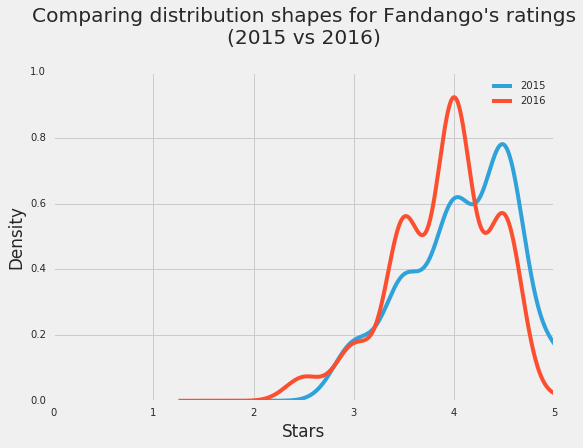

In [15]:
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(range(0,5.1,.5))
plt.show()

Looking at the Kernel Density of both of these datasets, while both are heavily skewed to the left, the 2016 graph is slightly more normal in distribution relative to the 2015 graph. The center peak of the 2016 graph is around the 4 start mark, while the peak of the 2015 graph is at 5 stars, the max rating, greatly hinting of an inflation in scores in 2015.

Create reative frequency tables showing percentage of scores in each year

In [18]:
print('2015' + '\n' + '-' * 16) #label table with year
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [19]:
print('2016' + '\n' + '-' * 16)#label table with year
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Looking at the data between the two years, we can see a sharp shift in the score values between years. There are no films even rated 2.5 stars in 2015, and that is 3% of the data in 2016

In [21]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Generating summary statistics of the data


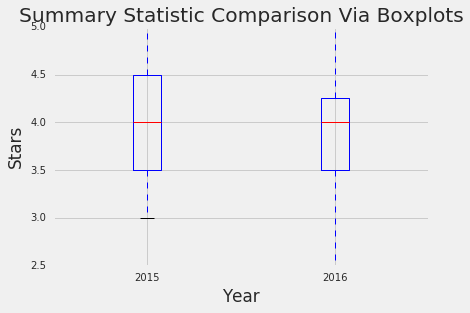

In [30]:
plt.style.use("fivethirtyeight")
plt.boxplot([fandango_2015['Fandango_Stars'], fandango_2016["fandango"]], labels = ["2015", "2016"])
plt.ylabel("Stars")
plt.xlabel("Year")
plt.title("Summary Statistic Comparison Via Boxplots")

2016 has a slightly lower mean score than 2015 and a significantly larger overall spread of scores, indicating a trend toward lower scores in 2016 relative to 2015